In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df1=pd.read_csv("Titanic_train.csv")
df1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
df1.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df1.describe().T


,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [6]:
df1["Age"].isnull().sum()

177

In [7]:
df1["Cabin"].isnull().sum()#this column has way too many null values so it will be better to drop the column as it might effect our predictions

687

In [8]:
df1.drop(columns="Cabin",inplace=True)

In [9]:
df1['Title'] = df1['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)


we can even add the title column which gets inputs from  the name column and it extracts  its titles only and do some mapping here ,so that this information becomes useful.

In [10]:
title_mapping = {
    'Mr': 'Mr', 'Mrs': 'Mrs', 'Miss': 'Miss', 'Master': 'Master', 'Dr': 'Rare', 'Rev': 'Rare', 'Col': 'Rare', 
    'Major': 'Rare', 'Mlle': 'Miss', 'Mme': 'Mrs', 'Lady': 'Rare', 'Sir': 'Rare', 'Capt': 'Rare', 'Countess': 'Rare', 
    'Jonkheer': 'Rare', 'Don': 'Rare',"Ms":"Ms"
}#let's create a dictionary where we replace the titles with the specified entries

In [11]:
df1['Title'] = df1['Title'].map(title_mapping)


In [12]:
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr


we have created the title  column which is related to the titles of the names and now we can drop the name column

In [13]:
df1["Title"].isnull().sum()#checking if title has any null values

0

In [14]:
df1.drop(columns="Name",inplace=True)

In [15]:
df1

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,S,Mr
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C,Mrs
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss
3,4,1,1,female,35.0,1,0,113803,53.1000,S,Mrs
4,5,0,3,male,35.0,0,0,373450,8.0500,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,211536,13.0000,S,Rare
887,888,1,1,female,19.0,0,0,112053,30.0000,S,Miss
888,889,0,3,female,NaN,1,2,W./C. 6607,23.4500,S,Miss
889,890,1,1,male,26.0,0,0,111369,30.0000,C,Mr


In [16]:
#ticket columnn seems to me that it holds less significance so we will drop the column here

In [17]:
df1.drop(columns="Ticket",inplace=True)

In [18]:
df1

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,male,22.0,1,0,7.2500,S,Mr
1,2,1,1,female,38.0,1,0,71.2833,C,Mrs
2,3,1,3,female,26.0,0,0,7.9250,S,Miss
3,4,1,1,female,35.0,1,0,53.1000,S,Mrs
4,5,0,3,male,35.0,0,0,8.0500,S,Mr
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,S,Rare
887,888,1,1,female,19.0,0,0,30.0000,S,Miss
888,889,0,3,female,NaN,1,2,23.4500,S,Miss
889,890,1,1,male,26.0,0,0,30.0000,C,Mr


In [19]:
df1["Fare"]=df1["Fare"].round(2)

In [20]:
df1

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,male,22.0,1,0,7.25,S,Mr
1,2,1,1,female,38.0,1,0,71.28,C,Mrs
2,3,1,3,female,26.0,0,0,7.92,S,Miss
3,4,1,1,female,35.0,1,0,53.10,S,Mrs
4,5,0,3,male,35.0,0,0,8.05,S,Mr
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.00,S,Rare
887,888,1,1,female,19.0,0,0,30.00,S,Miss
888,889,0,3,female,NaN,1,2,23.45,S,Miss
889,890,1,1,male,26.0,0,0,30.00,C,Mr


In [21]:
df1["Age"].fillna(value=df1["Age"].mean(),inplace=True)

In [22]:
df1["Age"].isnull().sum()

0

In [23]:
df1.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       2
Title          0
dtype: int64

In [24]:
df1["Embarked"].fillna(value=df1["Embarked"].mode()[0],inplace=True)

In [25]:
df1["Embarked"].isnull().sum()

0

In [26]:
df1["Embarked"].mode()

0    S
Name: Embarked, dtype: object

In [27]:
df1.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
Title          0
dtype: int64

we removed all the null values

In [28]:
pid=pd.DataFrame(df1["PassengerId"])

In [29]:
pid.skew()

PassengerId    0.0
dtype: float64

In [30]:
sur=pd.DataFrame(df1["Survived"])

In [31]:
sur.skew()

Survived    0.478523
dtype: float64

In [32]:
Pcl=pd.DataFrame(df1["Pclass"])

In [33]:
Pcl.skew()

Pclass   -0.630548
dtype: float64

In [34]:
sex=pd.DataFrame(df1["Sex"])


In [35]:
age=pd.DataFrame(df1["Age"])

In [36]:
age.skew()

Age    0.434488
dtype: float64

In [37]:
sip=pd.DataFrame(df1["SibSp"])

In [38]:
sip.skew()

SibSp    3.695352
dtype: float64

In [39]:
par=pd.DataFrame(df1["Parch"])

In [40]:
par.skew()

Parch    2.749117
dtype: float64

In [41]:
far=pd.DataFrame(df1["Fare"])
far.skew()

Fare    4.787324
dtype: float64

In [42]:
emb=pd.DataFrame(df1["Embarked"])

## LETS CHECK THE SKEWNESS AND OUTLIERS

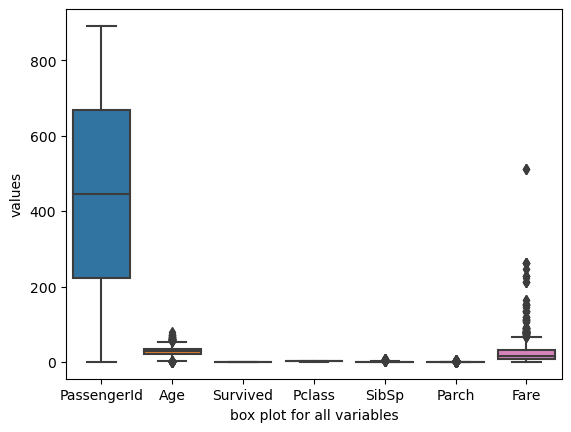

In [43]:
relations=df1[["PassengerId","Age","Survived","Pclass","SibSp","Parch","Fare"]]
sns.boxplot(relations)
plt.xlabel("box plot for all variables")
plt.ylabel("values")
plt.show()

In [44]:
#Fare and age seems to have lots of outliers so we will first remove the outliers here

In [45]:
Q1offare=np.percentile(df1["Fare"],20) #we will keep the threshold to avoid data loss

In [46]:
Q3offare=np.percentile(df1["Fare"],80)

In [47]:
IQR=(Q3offare)-(Q1offare)

In [48]:
upperwhisker=Q3offare + 1.5*(IQR)

In [49]:
lowerwhisker=Q1offare - 1.5*(IQR)

In [50]:
uppercondition=df1["Fare"] < upperwhisker
lowercondition=df1["Fare"] > lowerwhisker

In [51]:
df1["Fare"][df1["Fare"] > upperwhisker].count()#we have 60 outliers in upperwhisker

63

In [52]:
df1["Fare"][df1["Fare"] < lowerwhisker].count()#we dont have outliers in the lowerwhisker

0

In [53]:
filter = lowercondition & uppercondition

In [54]:
cleandata=df1.loc[filter,"Fare"].tolist()#we will filter the data without outiers

In [55]:
df1["Fare"]=pd.DataFrame(cleandata)# we will replace the cleandata of outliers with the actual data

In [56]:
df1["Fare"].isnull().sum()

63

In [57]:
df1.fillna(value=df1["Fare"].mean(),inplace=True)#we will fill the null values with its mean

In [58]:
df1["Fare"].isnull().sum()

0

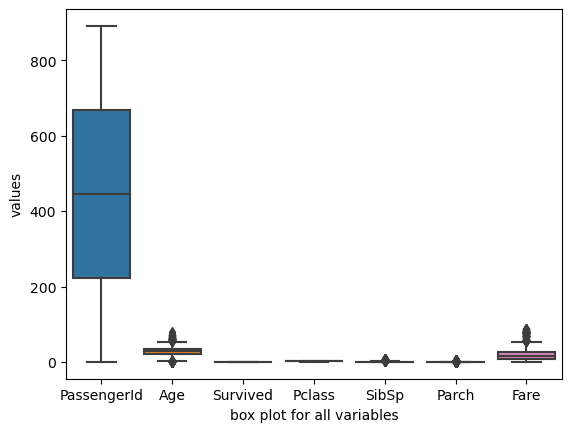

In [59]:
relations=df1[["PassengerId","Age","Survived","Pclass","SibSp","Parch","Fare"]]
sns.boxplot(relations)
plt.xlabel("box plot for all variables")
plt.ylabel("values")
plt.show()

In [60]:
#we still have some outliers but we will see if our accuracy or error is affected by it then we will remove it 

In [61]:
columns = ["PassengerId", "Age", "Survived", "Pclass", "SibSp", "Parch", "Fare"]


In [62]:
#We will plot scatter plot one by one now

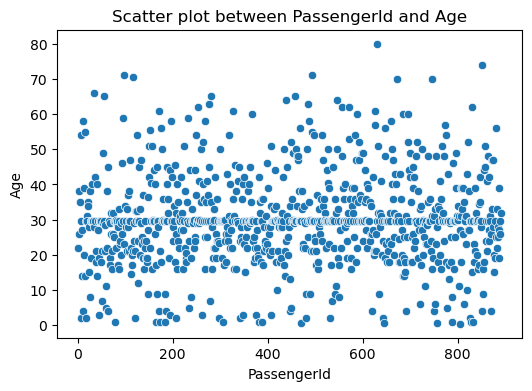

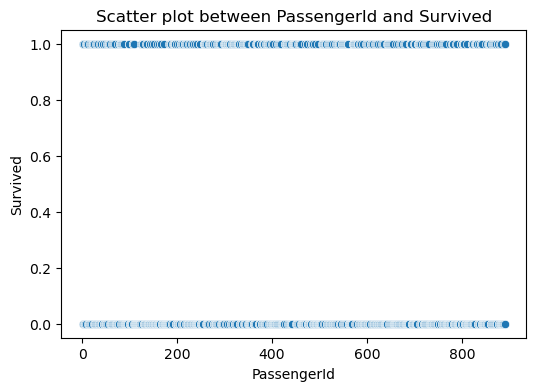

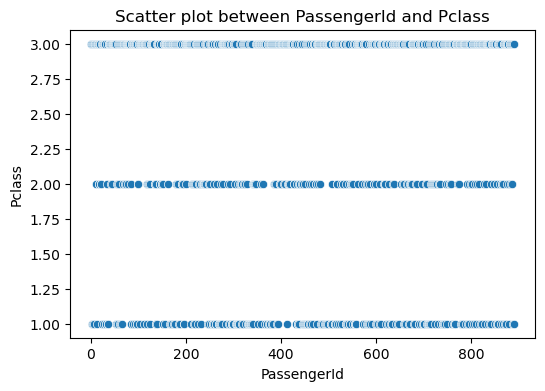

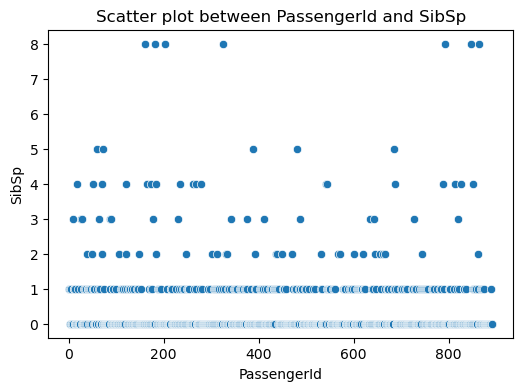

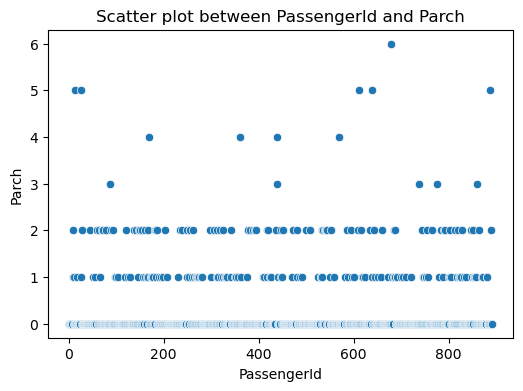

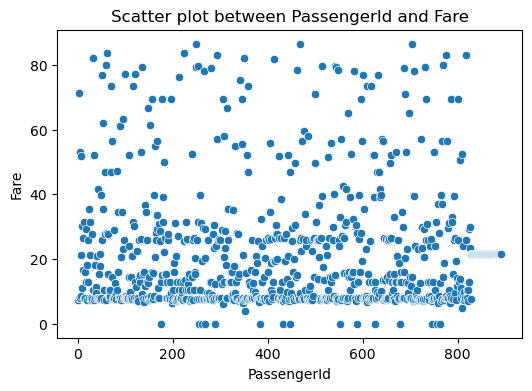

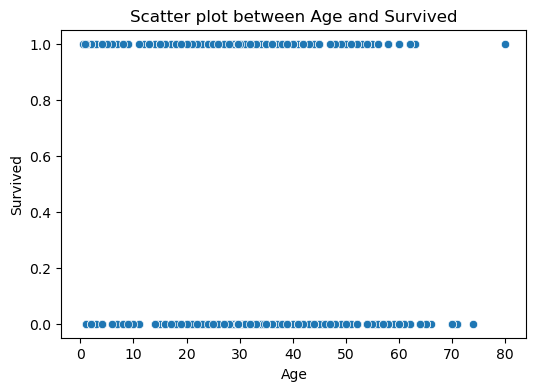

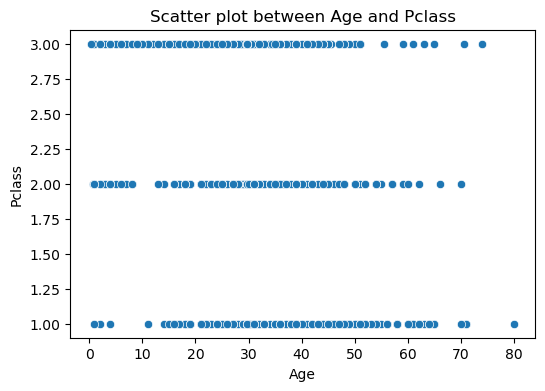

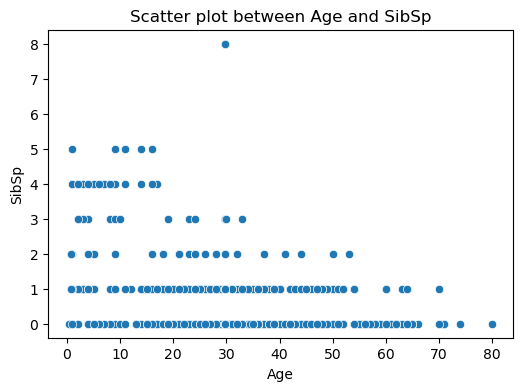

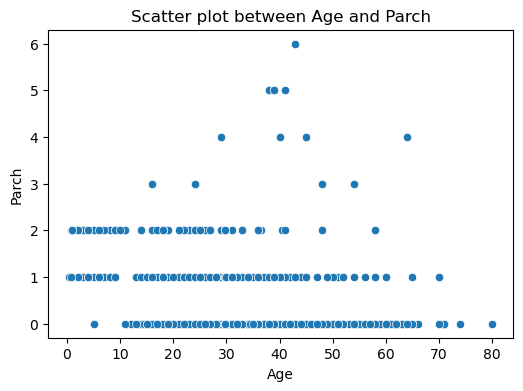

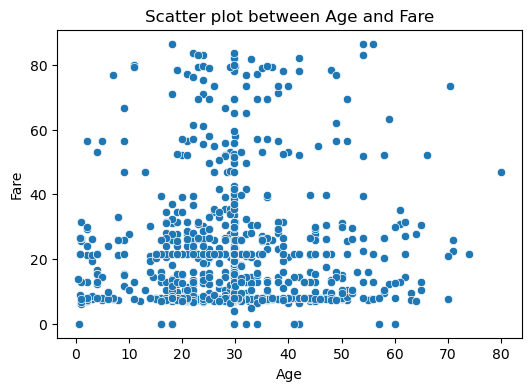

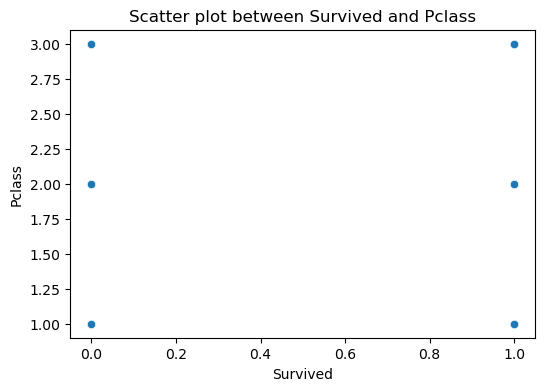

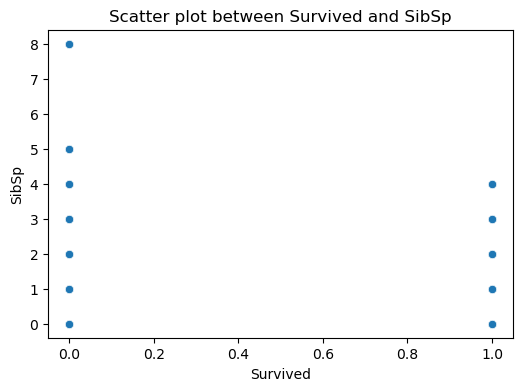

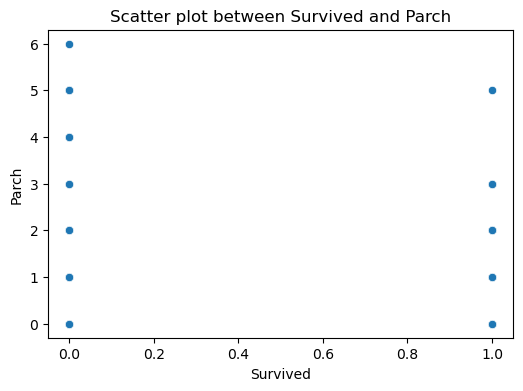

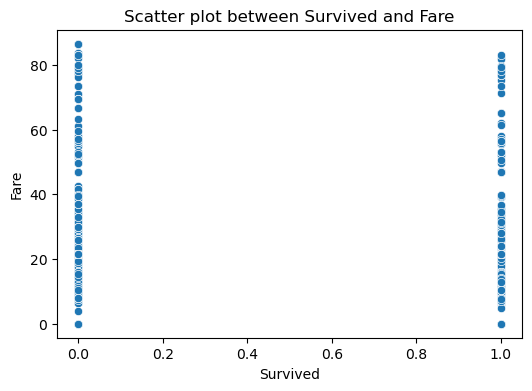

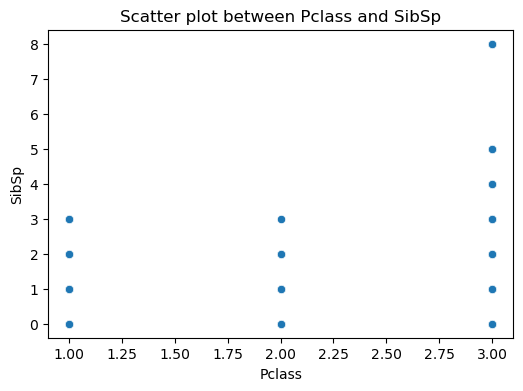

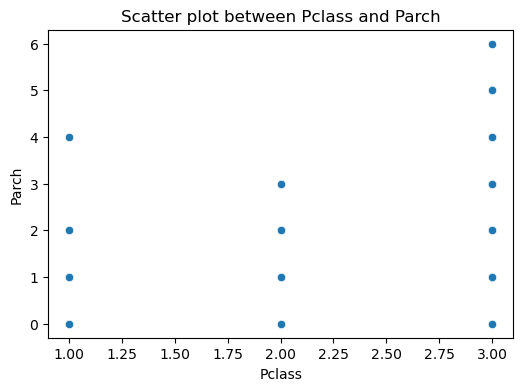

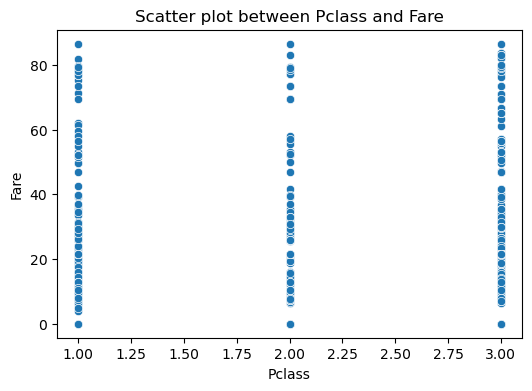

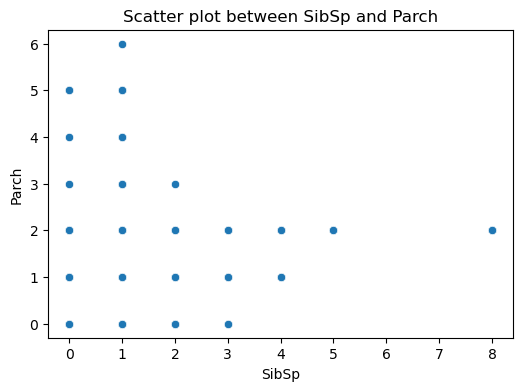

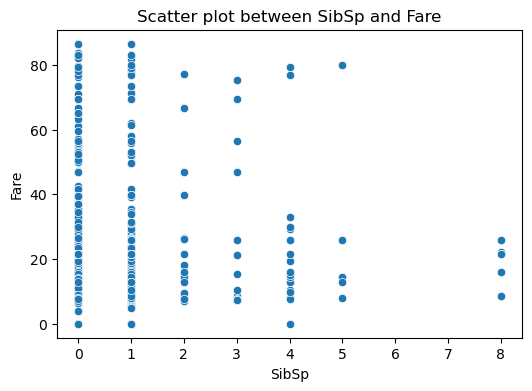

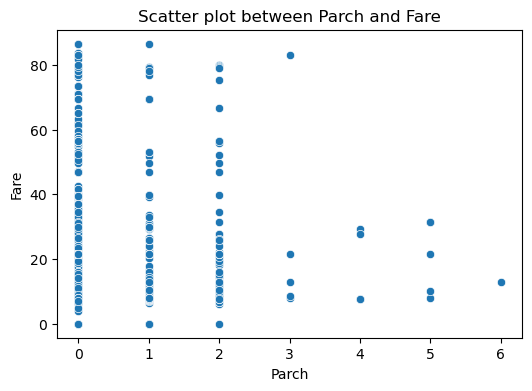

In [63]:
for i in range(len(columns)):
    for j in range(i + 1, len(columns)):
        plt.figure(figsize=(6, 4))
        sns.scatterplot(x=relations[columns[i]], y=relations[columns[j]])
        plt.title(f'Scatter plot between {columns[i]} and {columns[j]}')
        plt.xlabel(columns[i])
        plt.ylabel(columns[j])
        plt.show()

for categorical data like sibsp(siblings and spouses)and parch(parents and children)we'll try getting a much better understanding of this data by plotting a bargraph or stacked bar plot

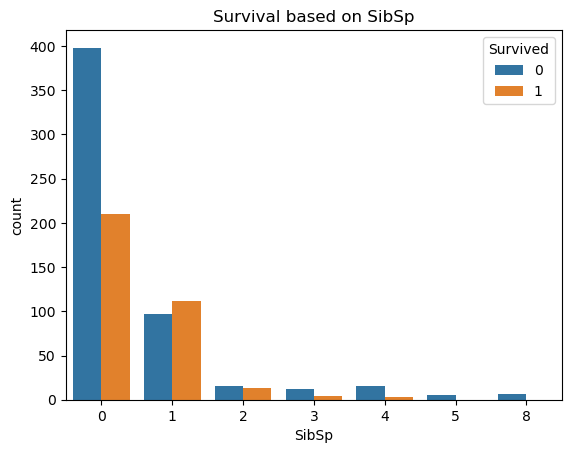

In [64]:
sns.countplot(x='SibSp', hue='Survived', data=df1)
plt.title('Survival based on SibSp')
plt.show()

With this we can see that passengers with no siblings or spouses were more and amongst them almost 200+ passengers survived and passengers with 1 sbsp survived more and passengers with 2 sibsp survvied more as well

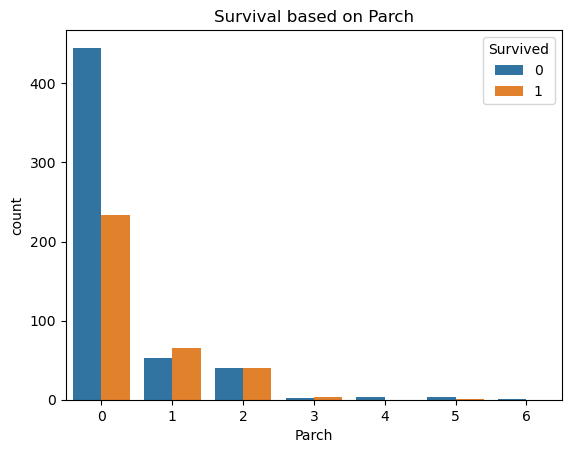

In [65]:
sns.countplot(x='Parch', hue='Survived', data=df1)
plt.title('Survival based on Parch')
plt.show()

passengers who had no children or parents were more on the ship and half of them survived where as amongst the passengers who had 1 or more parent aor children were less but survived more amongst them

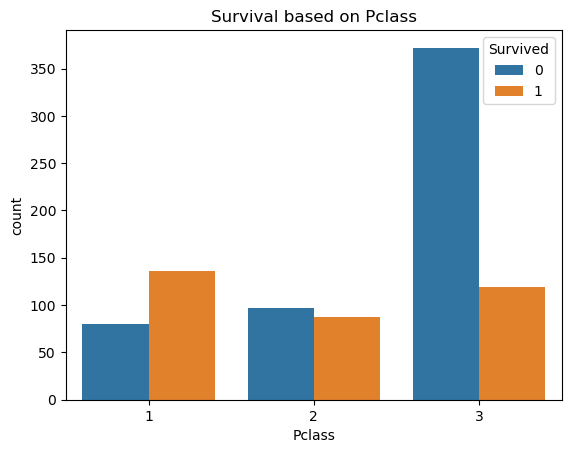

In [66]:
sns.countplot(x='Pclass', hue='Survived', data=df1)
plt.title('Survival based on Pclass')
plt.show()

passengers with the third class were more in numbers but only 30% of them survived where as passengers with class 1 and 2 were less ,and the survival rate were more over there  as seen above

In [67]:
from sklearn.preprocessing import LabelEncoder,StandardScaler


In [68]:
LE=LabelEncoder()

In [69]:
SS=StandardScaler()

In [70]:
x=df1[df1.columns[df1.columns != df1.columns[1]]]
#removing our target column "survived"


In [71]:
x1=x.select_dtypes(include=["float64","int64"])
x1



,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,1,3,22.000000,1,0,7.250000
1,2,1,38.000000,1,0,71.280000
2,3,3,26.000000,0,0,7.920000
3,4,1,35.000000,1,0,53.100000
4,5,3,35.000000,0,0,8.050000
...,...,...,...,...,...,...
886,887,2,27.000000,0,0,21.586969
887,888,1,19.000000,0,0,21.586969
888,889,3,29.699118,1,2,21.586969
889,890,1,26.000000,0,0,21.586969


In [72]:
X=SS.fit_transform(x1)
X=pd.DataFrame(X)


In [73]:
x2 = df1.select_dtypes(include=["object"])
x2.shape

(891, 3)

In [74]:
x1

,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,1,3,22.000000,1,0,7.250000
1,2,1,38.000000,1,0,71.280000
2,3,3,26.000000,0,0,7.920000
3,4,1,35.000000,1,0,53.100000
4,5,3,35.000000,0,0,8.050000
...,...,...,...,...,...,...
886,887,2,27.000000,0,0,21.586969
887,888,1,19.000000,0,0,21.586969
888,889,3,29.699118,1,2,21.586969
889,890,1,26.000000,0,0,21.586969


In [75]:
x2=pd.DataFrame(x2)
x2.shape

(891, 3)

In [76]:
x3=x2.apply(LE.fit_transform)
x3.tail()

,Sex,Embarked,Title
886,1,2,5
887,0,2,1
888,0,2,1
889,1,0,2
890,1,1,2


In [77]:
x3["Title"].unique()

array([2, 3, 1, 0, 5, 4])

In [78]:
x3=pd.DataFrame(x3)

In [79]:
XX=pd.concat([X,x3],axis=1)

In [80]:
XX

,0,1,2,3,4,5,Sex,Embarked,Title
0,-1.730108,0.827377,-0.592481,0.432793,-0.473674,-7.615309e-01,1,2,2
1,-1.726220,-1.566107,0.638789,0.432793,-0.473674,2.639525e+00,0,0,3
2,-1.722332,0.827377,-0.284663,-0.474545,-0.473674,-7.259428e-01,0,2,1
3,-1.718444,-1.566107,0.407926,0.432793,-0.473674,1.673865e+00,0,2,3
4,-1.714556,0.827377,0.407926,-0.474545,-0.473674,-7.190377e-01,1,2,2
...,...,...,...,...,...,...,...,...,...
886,1.714556,-0.369365,-0.207709,-0.474545,-0.473674,1.887081e-16,1,2,5
887,1.718444,-1.566107,-0.823344,-0.474545,-0.473674,1.887081e-16,0,2,1
888,1.722332,0.827377,0.000000,0.432793,2.008933,1.887081e-16,0,2,1
889,1.726220,-1.566107,-0.284663,-0.474545,-0.473674,1.887081e-16,1,0,2


In [81]:
XX.rename(columns={'Sex': 6,"Embarked":7,"Title":8}, inplace=True)

In [82]:
print([type(col) for col in XX.columns])

[<class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>]


In [83]:
XX

,0,1,2,3,4,5,6,7,8
0,-1.730108,0.827377,-0.592481,0.432793,-0.473674,-7.615309e-01,1,2,2
1,-1.726220,-1.566107,0.638789,0.432793,-0.473674,2.639525e+00,0,0,3
2,-1.722332,0.827377,-0.284663,-0.474545,-0.473674,-7.259428e-01,0,2,1
3,-1.718444,-1.566107,0.407926,0.432793,-0.473674,1.673865e+00,0,2,3
4,-1.714556,0.827377,0.407926,-0.474545,-0.473674,-7.190377e-01,1,2,2
...,...,...,...,...,...,...,...,...,...
886,1.714556,-0.369365,-0.207709,-0.474545,-0.473674,1.887081e-16,1,2,5
887,1.718444,-1.566107,-0.823344,-0.474545,-0.473674,1.887081e-16,0,2,1
888,1.722332,0.827377,0.000000,0.432793,2.008933,1.887081e-16,0,2,1
889,1.726220,-1.566107,-0.284663,-0.474545,-0.473674,1.887081e-16,1,0,2


In [84]:
Y=df1["Survived"]

In [85]:
cor=pd.concat([XX,Y],axis=1)#lets concat the data and check our correlation
cor.rename(columns={0:"PassengerId",1:"Pclass",2:"Age",3:"SibSp",4:"Parch" ,5:"Fare",6:"Sex",7:"Embarked",8:"Title"}, inplace=True)

let's check passengers and their survival numbers amongst male or female

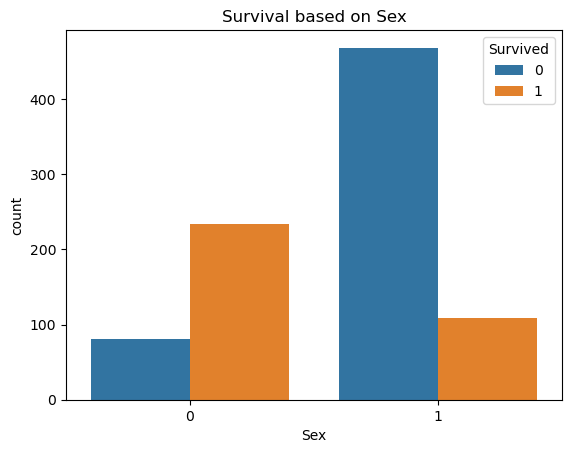

In [86]:
sns.countplot(x='Sex', hue='Survived', data=cor)
plt.title('Survival based on Sex')
plt.show()

passengers who wer female were more in numbers but amongst them survived less,as compared to male passengers


In [87]:
#lets check passengers who boarded from ports 0(C = Cherbourg), 1(S = Southampton),2(Q = Queenstown) survival numbers.

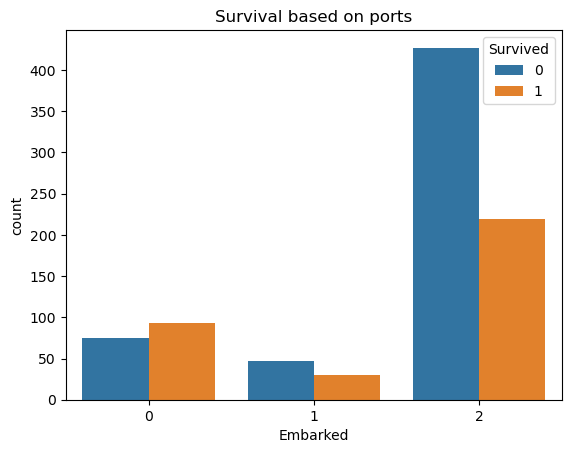

In [88]:
sns.countplot(x='Embarked', hue='Survived', data=cor)
plt.title('Survival based on ports')
plt.show()

passengers who boarded from queenstown were more in mumbers but they survived less as compared to the passengers who boarded from cherboug or southhampton were less in numbers but amongst them were people who survived more.

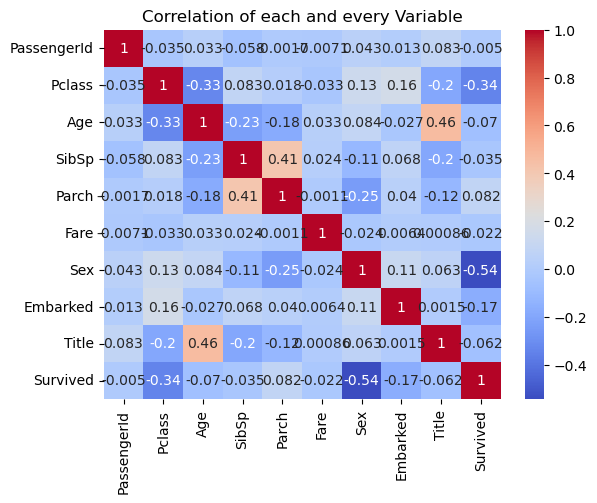

In [89]:
correlation_matrix=cor[cor.columns].corr()
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm')
plt.title("Correlation of each and every Variable")
plt.show()

with this we have some observations that says:
-- sex and survived class have some negative correlation
-- passenger class have some sort of negative correlation as well \
we will check if this has any multicollinearity issues in this and see but first we'll plot the pair plot and visualise the correlation there.


In [90]:
#we will check the multicollinearity for this as we suspect that there is some multicollinearity issues

In [91]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [92]:
vif_data = pd.DataFrame()
vif_data["Feature"] = XX.columns
vif_data["VIF"] = [variance_inflation_factor(XX.values, i) for i in range(XX.shape[1])]

print(vif_data)

   Feature       VIF
0        0  1.006598
1        1  1.176731
2        2  1.281596
3        3  1.265006
4        4  1.276019
5        5  1.003490
6        6  2.792820
7        7  3.713483
8        8  3.977464


In [93]:
#HENce we PROve that there s no multicollinearity in this data

In [94]:
testdf=pd.read_csv("Titanic_test.csv")
testdf

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [95]:
testdf.drop(columns="Cabin",inplace=True)


In [96]:
testdf

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S
...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,S


In [97]:
testdf.drop(columns="Ticket",inplace=True)

In [98]:
testdf['Title'] = testdf['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)


In [99]:
testdf['Title'] = testdf['Title'].map(title_mapping)


In [100]:
testdf["Age"].fillna(value=testdf["Age"].mean(),inplace=True)

In [101]:
testdf["Fare"]=testdf["Fare"].round(2)

In [102]:
testdf["Embarked"].fillna(value=testdf["Embarked"].mode()[0],inplace=True)

In [103]:
testdf.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           1
Embarked       0
Title          1
dtype: int64

In [104]:
testdf["Title"].fillna(value="Ms",inplace=True)

In [105]:
testdf.drop(columns="Name",inplace=True)

In [106]:
testdf["Fare"].fillna(value=testdf["Fare"].mean(),inplace=True)

In [107]:
testdf.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
Title          0
dtype: int64

# WE Will START OUR FIRST MODEL WITH TRAIN TEST SPLIT AND LOGISTIC REGRESSION

In [108]:
from sklearn.linear_model import LogisticRegression

In [109]:
LR=LogisticRegression()

In [110]:
from sklearn.model_selection import train_test_split

In [111]:
from sklearn.metrics import mean_squared_error,accuracy_score,recall_score,f1_score,precision_score

## we will do data validation and see the results

In [112]:
avgtrain_accuracy=[]#creating an empty list to collectr all the train  
#accuracy scores so that we get the avg of all 100 iterations
avgtest_accuracy=[]#creating an empty list to collectr all test accuracy 
#scores so that we get the avg of all 100 iterations
avgtrainerror=[]
avgtesterror=[]

In [113]:
for i in range(1,101):#for 100 iterations
    X_train,X_Val,Y_train,Y_Val=train_test_split(XX,Y,test_size=0.30,random_state=i)
    #random_state is given as i
    LR.fit(X_train,Y_train)
    ytrainpred=LR.predict(X_train)
    ytestpred=LR.predict(X_Val)
    avgtrain_accuracy.append(accuracy_score(ytrainpred,Y_train))
#adding to empty list
    avgtest_accuracy.append(accuracy_score(ytestpred,Y_Val))
#adding to empty list
training_error=mean_squared_error(Y_train,ytrainpred).round(3)
test_error=mean_squared_error(Y_Val,ytestpred).round(3)
#adding to empty list
avgtrainerror.append(training_error)
avgtesterror.append(test_error)
print("Average Train accuracy score is: ",np.mean(avgtrain_accuracy).round(3))
print("Average Test accuracy score is: ",np.mean(avgtest_accuracy).round(3))
print("AVG Training Error :",np.mean(avgtrainerror))
print("AVG Test Error :",np.mean(avgtesterror))

Average Train accuracy score is:  0.802
Average Test accuracy score is:  0.795
AVG Training Error : 0.189
AVG Test Error : 0.201


In [114]:
#train accuracy and test accuracy are pretty closeand so is the error 

In [115]:
#let's try 80 :20 split and 1000 iterations

In [116]:
avgtrain_accuracy1=[]#creating an empty list to collectr all the train  
#accuracy scores so that we get the avg of all 100 iterations
avgtest_accuracy1=[]#creating an empty list to collectr all test accuracy 
#scores so that we get the avg of all 100 iterations
avgtrainerror1=[]
avgtesterror1=[]

In [117]:
for i in range(1,1001):#for 1000 iterations
    X_train,X_Val,Y_train,Y_Val=train_test_split(XX,Y,test_size=0.20,random_state=i)
    #random_state is given as i
    LR.fit(X_train,Y_train)
    ytrainpred=LR.predict(X_train)
    ytestpred=LR.predict(X_Val)
    avgtrain_accuracy1.append(accuracy_score(ytrainpred,Y_train))
#adding to empty list
    avgtest_accuracy1.append(accuracy_score(ytestpred,Y_Val))
#adding to empty list
training_error=mean_squared_error(Y_train,ytrainpred).round(3)
test_error=mean_squared_error(Y_Val,ytestpred).round(3)
#adding to empty list
avgtrainerror1.append(training_error)
avgtesterror1.append(test_error)
print("Average Train accuracy score is: ",np.mean(avgtrain_accuracy1).round(3))
print("Average Test accuracy score is: ",np.mean(avgtest_accuracy1).round(3))
print("AVG Training Error :",np.mean(avgtrainerror1))
print("AVG Test Error :",np.mean(avgtesterror1))

Average Train accuracy score is:  0.801
Average Test accuracy score is:  0.792
AVG Training Error : 0.19
AVG Test Error : 0.218


## 2nd model let's try cross validation using kfold cross validation for better fit model

In [118]:
from sklearn.model_selection import KFold

In [119]:
kf=KFold(n_splits=5,shuffle=True,random_state=42)

In [120]:
for train_index,test_index in kf.split(XX):
    print(train_index,test_index)
    

[  0   1   2   3   4   6   7   8   9  11  12  13  14  15  16  17  18  19
  20  21  22  24  26  27  28  29  32  34  35  36  37  38  40  41  42  43
  45  46  47  48  50  51  52  53  55  56  57  58  59  60  61  62  64  68
  69  71  73  74  75  79  80  81  83  85  87  88  89  90  91  92  93  94
  95  98  99 100 101 102 103 104 105 106 107 108 111 112 113 114 115 116
 117 118 119 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135
 138 140 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157
 158 159 160 161 162 163 164 166 167 169 170 171 172 173 175 176 177 178
 179 180 181 182 183 184 185 186 187 188 189 190 191 193 194 195 197 199
 200 201 202 203 205 206 207 212 214 216 217 219 220 221 222 223 224 225
 226 228 229 230 232 233 234 236 237 238 239 240 241 242 243 245 246 247
 248 249 251 252 253 255 256 257 258 259 260 261 262 263 264 265 267 268
 269 270 271 272 273 274 276 277 278 279 282 283 284 285 287 288 289 293
 295 297 298 301 302 303 304 305 307 308 310 313 31

In [121]:
XX.iloc[train_index],XX.iloc[test_index]

(            0         1         2         3         4             5  6  7  8
 0   -1.730108  0.827377 -0.592481  0.432793 -0.473674 -7.615309e-01  1  2  2
 2   -1.722332  0.827377 -0.284663 -0.474545 -0.473674 -7.259428e-01  0  2  1
 3   -1.718444 -1.566107  0.407926  0.432793 -0.473674  1.673865e+00  0  2  3
 5   -1.710669  0.827377  0.000000 -0.474545 -0.473674 -6.972599e-01  1  1  2
 6   -1.706781 -1.566107  1.870059 -0.474545 -0.473674  1.608000e+00  1  2  2
 ..        ...       ...       ...       ...       ...           ... .. .. ..
 885  1.710669  0.827377  0.715743 -0.474545  5.732844  1.887081e-16  0  1  3
 886  1.714556 -0.369365 -0.207709 -0.474545 -0.473674  1.887081e-16  1  2  5
 888  1.722332  0.827377  0.000000  0.432793  2.008933  1.887081e-16  0  2  1
 889  1.726220 -1.566107 -0.284663 -0.474545 -0.473674  1.887081e-16  1  0  2
 890  1.730108  0.827377  0.177063 -0.474545 -0.473674  1.887081e-16  1  1  2
 
 [713 rows x 9 columns],
             0         1         2   

In [122]:
avgtrain_accuracy3=[]#creating an empty list to collectr all the train  
#accuracy scores so that we get the avg of all 100 iterations
avgtest_accuracy3=[]#creating an empty list to collectr all test accuracy 
#scores so that we get the avg of all 100 iterations
avgtrainerror3=[]
avgtesterror3=[]

In [123]:
for train_index,test_index in kf.split(XX):
    #print(train_index)--->you can see it has divided into train and test
    #print(test_index)---->you can see it has divided into train and test
    X_train,X_Val=XX.iloc[train_index],XX.iloc[test_index]
    Y_train,Y_Val=Y.iloc[train_index],Y.iloc[test_index]
    LR.fit(X_train,Y_train)
    ytrain_pred=LR.predict(X_train)
    ytest_pred=LR.predict(X_Val)
    ac1=accuracy_score(ytrain_pred,Y_train)
    ac2=accuracy_score(ytest_pred,Y_Val)
    training_error=mean_squared_error(Y_train,ytrain_pred).round(3)
    test_error=mean_squared_error(Y_Val,ytest_pred).round(3)


print("Average Train accuracy score is: ",ac1.round(3))
print("Average Test accuracy score is: ",ac2.round(3))
print("AVG Training Error :",training_error)
print("AVG Test Error :",test_error)
print("************************************************")

Average Train accuracy score is:  0.808
Average Test accuracy score is:  0.792
AVG Training Error : 0.192
AVG Test Error : 0.208
************************************************


In [124]:
#test accuracy remained the same even after doing kfold cross validation ,we'll try regularization

## 3rd model we'll try with regularization and datavalidation

In [125]:
model=LogisticRegression(penalty="l1",solver="liblinear",C=0.5)#we have used lasso regression here 

In [126]:
avgtrain_accuracy3=[]#creating an empty list to collectr all the train  
#accuracy scores so that we get the avg of all 100 iterations
avgtest_accuracy3=[]#creating an empty list to collectr all test accuracy 
#scores so that we get the avg of all 100 iterations
avgtrainerror3=[]
avgtesterror3=[]

In [127]:
for i in range(1,1001):#for 1000 iterations
    X_train,X_Val,Y_train,Y_Val=train_test_split(XX,Y,test_size=0.20,random_state=i)
    #random_state is given as i
    model.fit(X_train,Y_train)
    ytrainpred=model.predict(X_train)
    ytestpred=model.predict(X_Val)
    avgtrain_accuracy3.append(accuracy_score(ytrainpred,Y_train))
#adding to empty list
    avgtest_accuracy3.append(accuracy_score(ytestpred,Y_Val))
#adding to empty list
training_error=mean_squared_error(Y_train,ytrainpred).round(3)
test_error=mean_squared_error(Y_Val,ytestpred).round(3)
#adding to empty list
avgtrainerror3.append(training_error)
avgtesterror3.append(test_error)
print("Average Train accuracy score is: ",np.mean(avgtrain_accuracy3).round(3))
print("Average Test accuracy score is: ",np.mean(avgtest_accuracy3).round(3))
print("AVG Training Error :",np.mean(avgtrainerror3))
print("AVG Test Error :",np.mean(avgtesterror3))

Average Train accuracy score is:  0.801
Average Test accuracy score is:  0.792
AVG Training Error : 0.188
AVG Test Error : 0.207


### after trying 3 different models we can safely say that the first validatio set approach model woth just 100 iteration is a better model 

In [128]:
for i in range(1,101):#for 100 iterations
    X_train,X_Val,Y_train,Y_Val=train_test_split(XX,Y,test_size=0.30,random_state=i)
    #random_state is given as i
    LR.fit(X_train,Y_train)
    ytrainpred=LR.predict(X_train)
    ytestpred=LR.predict(X_Val)
    avgtrain_accuracy.append(accuracy_score(ytrainpred,Y_train))
#adding to empty list
    avgtest_accuracy.append(accuracy_score(ytestpred,Y_Val))
#adding to empty list
training_error=mean_squared_error(Y_train,ytrainpred).round(3)
test_error=mean_squared_error(Y_Val,ytestpred).round(3)
#adding to empty list
avgtrainerror.append(training_error)
avgtesterror.append(test_error)
print("Average Train accuracy score is: ",np.mean(avgtrain_accuracy).round(3))
print("Average Test accuracy score is: ",np.mean(avgtest_accuracy).round(3))
print("AVG Training Error :",np.mean(avgtrainerror))
print("AVG Test Error :",np.mean(avgtesterror))

Average Train accuracy score is:  0.802
Average Test accuracy score is:  0.795
AVG Training Error : 0.189
AVG Test Error : 0.201


In [129]:
from sklearn.metrics import confusion_matrix

In [130]:
Y_Val.shape

(268,)

In [131]:
cm=confusion_matrix(Y_Val,ytestpred)
cm

array([[140,  19],
       [ 35,  74]], dtype=int64)

out of the 268 test evaluation data our mmodel LR model predicted 140 true negatives and 19 false negatives and 74 as true positives and35 asfalse negatives

'''


#### our recall/sensitivity score is the most important in knowing out of all the positives how much did our model predicted to be as positive and precision is out of all the positives and negatives, did our model predict them precisely .a f1 score is both precision score and recall score together 

In [132]:
print("test accuracy score is : ",np.mean(avgtest_accuracy).round(3))
print("train accuracy score is : ",np.mean(avgtrain_accuracy).round(3))
print("recall score:",recall_score(Y_Val,ytestpred).round(3))
print("precision score:",precision_score(Y_Val,ytestpred).round(3))
print("f1 score:",f1_score(Y_Val,ytestpred).round(3))

test accuracy score is :  0.795
train accuracy score is :  0.802
recall score: 0.679
precision score: 0.796
f1 score: 0.733


Our recall score is not that great so we'll put a cutoff and try to  see if our recall gets any better

In [133]:
yprob=LR.predict_proba(X_Val)[:,1:]


In [134]:
y_pred = (yprob >= 0.4).astype(int)#True positives as 0 and true negatives as 1 ,we're keeping the cutoff as 

In [135]:
print("recall score after the cutoff:",recall_score(Y_Val,y_pred).round(3))# our recall has increased 
print("precision score:",precision_score(Y_Val,y_pred).round(3))# so did our precision
print("f1 score:",f1_score(Y_Val,y_pred).round(3))# and even f1 score

recall score after the cutoff: 0.743
precision score: 0.764
f1 score: 0.753


we will calculate the auc_score and roc curve

In [136]:
from sklearn.metrics import roc_curve,roc_auc_score

### roc curve will calculate the true posotive rate and false +ve rate
### it will help in cinstructing a graph of tpr and fpr

In [137]:
fpr,tpr,dummy=roc_curve(Y_Val,yprob)
#dummy is a parameter without which the roc fn wont work

In [138]:
fpr

array([0.        , 0.        , 0.        , 0.00628931, 0.00628931,
       0.01886792, 0.01886792, 0.02515723, 0.02515723, 0.03144654,
       0.03144654, 0.03773585, 0.03773585, 0.04402516, 0.04402516,
       0.05031447, 0.05031447, 0.05660377, 0.05660377, 0.06289308,
       0.06289308, 0.0754717 , 0.0754717 , 0.09433962, 0.09433962,
       0.10062893, 0.10062893, 0.11320755, 0.11320755, 0.11949686,
       0.11949686, 0.13836478, 0.13836478, 0.14465409, 0.14465409,
       0.1509434 , 0.1509434 , 0.1572327 , 0.1572327 , 0.17610063,
       0.17610063, 0.18238994, 0.18238994, 0.20125786, 0.20125786,
       0.20754717, 0.20754717, 0.21383648, 0.21383648, 0.28301887,
       0.28301887, 0.33962264, 0.33962264, 0.34591195, 0.34591195,
       0.3836478 , 0.3836478 , 0.38993711, 0.38993711, 0.39622642,
       0.39622642, 0.40251572, 0.40251572, 0.40880503, 0.40880503,
       0.43396226, 0.43396226, 0.52830189, 0.52830189, 0.55345912,
       0.55345912, 0.56603774, 0.56603774, 0.57232704, 0.57232

In [139]:
tpr

array([0.        , 0.00917431, 0.33027523, 0.33027523, 0.35779817,
       0.35779817, 0.3853211 , 0.3853211 , 0.43119266, 0.43119266,
       0.44036697, 0.44036697, 0.49541284, 0.49541284, 0.52293578,
       0.52293578, 0.55963303, 0.55963303, 0.58715596, 0.58715596,
       0.59633028, 0.59633028, 0.6146789 , 0.6146789 , 0.62385321,
       0.62385321, 0.63302752, 0.63302752, 0.65137615, 0.65137615,
       0.68807339, 0.68807339, 0.69724771, 0.69724771, 0.71559633,
       0.71559633, 0.73394495, 0.73394495, 0.74311927, 0.74311927,
       0.75229358, 0.75229358, 0.76146789, 0.76146789, 0.7706422 ,
       0.7706422 , 0.77981651, 0.77981651, 0.78899083, 0.78899083,
       0.79816514, 0.79816514, 0.80733945, 0.80733945, 0.81651376,
       0.81651376, 0.83486239, 0.83486239, 0.8440367 , 0.8440367 ,
       0.85321101, 0.85321101, 0.87155963, 0.87155963, 0.88073394,
       0.88073394, 0.88990826, 0.88990826, 0.89908257, 0.89908257,
       0.90825688, 0.90825688, 0.91743119, 0.91743119, 0.92660

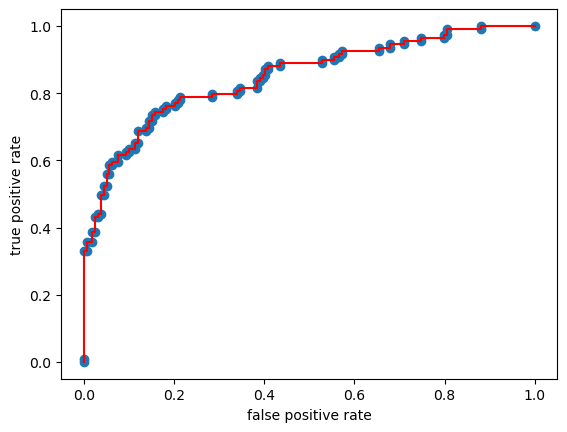

In [140]:
plt.scatter(x=fpr ,y=tpr)
plt.plot(fpr,tpr,color="red")
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.show()

In [141]:
roc_auc_score(Y_Val,yprob)

0.8494028042236454

In [142]:
print("AUC score is :",roc_auc_score(Y_Val,yprob).round(2))

AUC score is : 0.85


our auc score is good at 85% which says that our model is classifying and distinguishing between the true positives and false positive atany threshold or cutoffs having the  score  of 85% which is a good model.

## Now we will predict this same model on our test titanic dataset which we did the eda before,but now we will preprocess it.

In [143]:
xt=testdf.select_dtypes(include=["float64","int64"])

In [144]:
xt=SS.fit_transform(xt)

In [145]:
xtt=testdf.select_dtypes(include=["object"])

In [146]:
xtt=xtt.apply(LE.fit_transform)

In [147]:
xtt=pd.DataFrame(xtt)

In [148]:
xt=pd.DataFrame(xt)

In [148]:
Xt=pd.concat([xt,xtt],axis=1)

In [149]:
Xt.rename(columns={'Sex': 6,"Embarked":7,"Title":8}, inplace=True)

In [150]:
Xt

,0,1,2,3,4,5,6,7,8
0,-1.727912,0.873482,0.334993,-0.499470,-0.400248,-0.498393,1,1,2
1,-1.719625,0.873482,1.325530,0.616992,-0.400248,-0.513275,0,2,3
2,-1.711337,-0.315819,2.514175,-0.499470,-0.400248,-0.465044,1,1,2
3,-1.703050,0.873482,-0.259330,-0.499470,-0.400248,-0.483512,1,2,2
4,-1.694763,0.873482,-0.655545,0.616992,0.619896,-0.418427,0,2,3
...,...,...,...,...,...,...,...,...,...
413,1.694763,0.873482,0.000000,-0.499470,-0.400248,-0.494449,1,2,2
414,1.703050,-1.505120,0.691586,-0.499470,-0.400248,1.313744,0,0,4
415,1.711337,0.873482,0.651965,-0.499470,-0.400248,-0.508792,1,2,2
416,1.719625,0.873482,0.000000,-0.499470,-0.400248,-0.494449,1,2,2


In [151]:
ypred=LR.predict(Xt)
ypred

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [152]:
LR.coef_

array([[ 0.01471918, -0.94896514, -0.41825977, -0.2774534 , -0.14169987,
        -0.04192392, -2.70966683, -0.23280982, -0.20133438]])

# INTERVIEW QUESTION

## 1. What is the difference between precision and recall?

PRECISION TELLS  Out of all the positive predictions I made, how many were actually PRECISE
RECALL TELLS Out of all the actual positives, how many POSITIVES did I correctly identify

## 2. What is cross-validation, and why is it important in binary classification?

CROSS VALIDATION splits the dta into multiple subsets and tests your model on those subsets and verifies if it generalizes well

it is important in binary classification because it helps in performance at different splits and make sure that the model doesn't overfit

In [149]:
import pickle 

In [83]:
with open("titanicLR.pkl", "wb") as pickle_out:
    pickle.dump(LR, pickle_out)